In [9]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_digits
from sklearn.metrics import accuracy_score
from sklearn.datasets import fetch_openml
from sklearn.base import clone
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
import statistics
import matplotlib.pyplot as plt
from collections import Counter

X, y = load_digits(return_X_y=True)
print(f"Number of features: {X.shape[1]}")
print(f"Number of samples: {X.shape[0]}")
print(f"Number of classes: {len(np.unique(y))}")
for i in range(X.shape[1]): # for each feature
    print(f"the variance of the {i} feature is: {statistics.variance(X[:,i])}") 
    print(f"the range of the {i} feature is from: {min(X[:,i])} to: {max(X[:,i])}")
    print(f"the mean of the {i} feature is: {statistics.mean(X[:,i])}")
    print(f"the median of the {i} feature is: {statistics.median(X[:,i])}")

Number of features: 64
Number of samples: 1797
Number of classes: 10
the variance of the 0 feature is: 0.0
the range of the 0 feature is from: 0.0 to: 0.0
the mean of the 0 feature is: 0.0
the median of the 0 feature is: 0.0
the variance of the 1 feature is: 0.822997497685452
the range of the 1 feature is from: 0.0 to: 8.0
the mean of the 1 feature is: 0.3038397328881469
the median of the 1 feature is: 0.0
the variance of the 2 feature is: 22.60837352033146
the range of the 2 feature is from: 0.0 to: 16.0
the mean of the 2 feature is: 5.204785754034502
the median of the 2 feature is: 4.0
the variance of the 3 feature is: 18.05265705153231
the range of the 3 feature is from: 0.0 to: 16.0
the mean of the 3 feature is: 11.835837506956038
the median of the 3 feature is: 13.0
the variance of the 4 feature is: 18.38169592230555
the range of the 4 feature is from: 0.0 to: 16.0
the mean of the 4 feature is: 11.848080133555927
the median of the 4 feature is: 13.0
the variance of the 5 feature i

In [10]:
def evaluate_accuracy(X_train, X_test, y_train, y_test, model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return accuracy_score(y_test, y_pred)

In [11]:
def plot_accuracy(r, accuracy, str):
    # r = x axis
    # accuracy = y axis
    plt.plot(r, accuracy)
    plt.xlabel('ratio of test set size')
    plt.ylabel('accuracy')
    plt.title(str)
    plt.show()
      
    

In [12]:
X, y = load_digits(return_X_y=True)

def logisticRegression__diff_ratios(X ,y, str):
    acc = []
    rs = [r for r in np.arange(0.1, 1, 0.1)]
    for r in rs:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=r)
        clf = LogisticRegression(max_iter=10000)
        accuracy = evaluate_accuracy(X_train, X_test, y_train, y_test, clf)
        acc.append(accuracy)
    plot_accuracy(rs, acc, str)
    

In [13]:
# The 1800 samples dataset is completely balanced (each label has 180 samples). Create
# a sub-dataset from it, of size 1000, which is unbalanced.
def create_unbalanced_dataset(X, y, size=1000):
    indexes = [i for i in range(len(X))]
    unbalced_1000 = np.random.choice(indexes, 1000)
    return X[unbalced_1000], y[unbalced_1000]




In [14]:
# find lmin: the number corresponding to the label that appears the least in the data.
def find_lmin(y):
    c = Counter(y) # count the number of each label - return a dictionary
    return c.most_common()[-1][1] # return the label that appears the least ([-1]), and its number ([0]) 
find_lmin(y)    


174

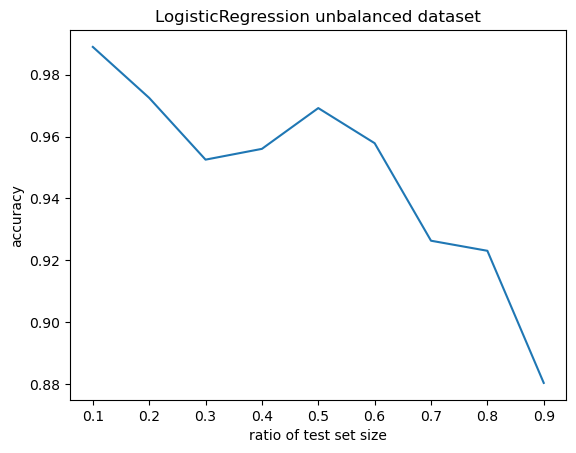

In [15]:
# for each label in the dataset, randomly select only lmin samples and add them to the new dataset.
def add_to_new_dataset(X, y):
    lmin = find_lmin(y)
    new_X = []
    new_y = []
    for i in range(10):
        indexes = [j for j in range(len(y)) if y[j] == i] # indexes of the samples with label i
        new_X.append(X[np.random.choice(indexes, lmin, replace=False)])
        new_y.append(y[np.random.choice(indexes, lmin, replace=False)])
    return np.concatenate(new_X), np.concatenate(new_y)

X, y = create_unbalanced_dataset(X, y, size=1000)
newX, newY = add_to_new_dataset(X, y)

logisticRegression__diff_ratios(newX, newY, 'LogisticRegression unbalanced dataset')
    
     



In [16]:
# function that gets train-set, test-set, and k and returns the best k features from the dataset and the accuracy achieved on the test-set
from itertools import combinations
def k_best_features_selection(train_set, test_set, k):
    return k_features_selection(train_set[0], test_set[0], train_set[1], test_set[1], k)

def k_features_selection(X_train, X_test, y_train, y_test, k):
    best_accuracy = 0  
    best_features = None
    clf = LogisticRegression(max_iter=10000)
    all_possible_group_of_features = combinations(range(X_train.shape[1]), k)
    for features in all_possible_group_of_features:
        # select the k features from the train-set and the test-set
        k_train_X = X_train[:, features]
        k_test_X = X_test[:, features]
        acc = evaluate_accuracy(k_train_X, k_test_X, y_train, y_test, clf)
        if acc > best_accuracy: # update the best accuracy and the best features
            best_features = features
            best_accuracy = acc
    return best_features, best_accuracy

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
best_features, best_accuracy = k_best_features_selection([X_train, y_train], [X_test, y_test], 2)
print(f"for k = 2, the best features are: {best_features} and the accuracy is: {best_accuracy}")


for k = 2, the best features are: (26, 53) and the accuracy is: 0.465
